<a href="https://colab.research.google.com/github/Samoh63/Machine-Learning/blob/main/make_moons_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install -U scikit-learn

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.utils import to_categorical

# Seed the RNG
np.random.seed = 42

[(5000, 2), (5000,)]


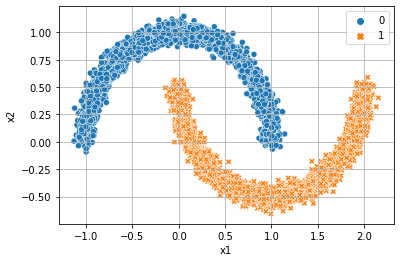

(5000, 2)
[(3750,), (1250,)]
[1875 1875]
[625 625]
[(3750, 2), (1250, 2)]


In [ ]:
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=5000, noise=0.05)

print([x.shape, y.shape])
ax = sns.scatterplot(x=x[:,0],y=x[:,1], hue=y, style=y)
ax.set(xlabel='x1', ylabel='x2')
plt.grid()
plt.show()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x) 
print(x.shape)

# divide the data into training and testing
xtrain, xtest, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)
print([y_train.shape, y_test.shape])
print(np.bincount(y_train))
print(np.bincount(y_test))

ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)
print([ytrain.shape, ytest.shape])

In [ ]:
# model selection
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(2,)))        #activation='relu', 'sigmoid', default is linear activation function
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model.summary()
plot_model(model, to_file='IMDB.png', show_shapes=True, show_layer_names=True)

history = model.fit(xtrain, ytrain, epochs=200, batch_size=64, validation_split=0.1, verbose=1)#, callbacks=[es])

test_loss, test_acc = model.evaluate(xtest, ytest)
print('test loss:', test_loss)
print('test accuracy:', test_acc)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                60        
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 2)                 42        
                                                                 
Total params: 942
Trainable params: 942
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
53/53 [==============================] - 1s 5ms/step - loss: 0.5613 - accuracy: 0.7881 - val_loss: 0.4127 - val_accuracy: 0.8800
Epoch 2/200
53/53 [============================

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred = np.argmax(model.predict(xtest), axis=1)
#for a, b in zip(y_test, ypred):
#    print(a, b)

print('Confusion matrix:')
print(confusion_matrix(y_test, ypred))

print('Precision score = %0.3f' % precision_score(y_test, ypred, average='weighted'))
print('Recall score = %0.3f' % recall_score(y_test, ypred, average='weighted'))

40/40 [==============================] - 0s 1ms/step
Confusion matrix:
[[625   0]
 [  0 625]]
Precision score = 1.000
Recall score = 1.000


13/13 [==============================] - 0s 2ms/step
(20, 20)
(400,)
400


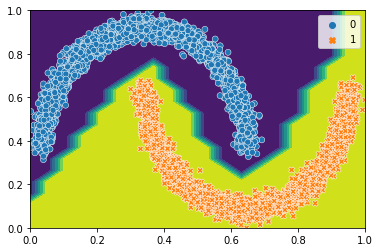

In [ ]:
# visualize your results
xmin = np.min(x[:,0])#-0.5
xmax = np.max(x[:,0])#+0.5

ymin = np.min(x[:,1])#-0.5
ymax = np.max(x[:,1])#+0.5

xg, yg = np.meshgrid(np.linspace(xmin, xmax, num=20), np.linspace(ymin, ymax, num=20))
z = np.argmax(model.predict(np.hstack((xg.reshape(-1,1), yg.reshape(-1,1)))),axis=1)
print(xg.shape)
print(z.shape)
print(np.size(xg))

plt.contourf(xg, yg, z.reshape(xg.shape))
ax = plt.gca()
sns.scatterplot(x=x[:,0],y=x[:,1], hue=y, style=y, ax=ax)
plt.show()


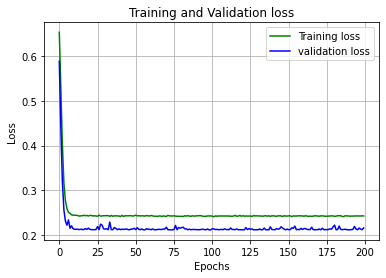

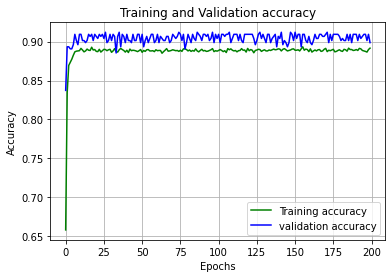

In [ ]:
epochs = 200
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,epochs)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, y_train)
y_pred = knn.predict(xtest)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0
